# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
NUMBER_OF_POINTS= 1500    # DEBUG 1500
BASE_URL= f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUMBER_OF_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUMBER_OF_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):    
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

       
    # Create endpoint URL with each city
    city_url =f"{BASE_URL}&q={city}"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print(f"City {city} not found status: {city_response.status_code}. Skipping...")
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atbara
Processing Record 2 of Set 1 | haparanda
Processing Record 3 of Set 1 | vuktyl
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | la foa
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | san angelo
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | pathein
Processing Record 14 of Set 1 | tadine
Processing Record 15 of Set 1 | kuala lipis
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | ouani
Processing Record 20 of Set 1 | crane
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | egilsstadir
Processin

Processing Record 33 of Set 4 | nynashamn
Processing Record 34 of Set 4 | callao
Processing Record 35 of Set 4 | punta arenas
Processing Record 36 of Set 4 | east london
Processing Record 37 of Set 4 | siparia
Processing Record 38 of Set 4 | porto belo
Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | kemijarvi
Processing Record 41 of Set 4 | rio grande
Processing Record 42 of Set 4 | haimen
Processing Record 43 of Set 4 | fada
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | youhao
Processing Record 46 of Set 4 | antofagasta
Processing Record 47 of Set 4 | san antonio del estrecho
City san antonio del estrecho not found status: 404. Skipping...
Processing Record 48 of Set 4 | swakopmund
Processing Record 49 of Set 4 | barvinkove
Processing Record 0 of Set 5 | xichang
Processing Record 1 of Set 5 | zaozersk
Processing Record 2 of Set 5 | puerto ayora
Processing Record 3 of Set 5 | utrik
Processing Record 4 of Set 5 | port macquarie
Processi

Processing Record 16 of Set 8 | la ronge
Processing Record 17 of Set 8 | berberati
Processing Record 18 of Set 8 | yicheng
Processing Record 19 of Set 8 | villamontes
Processing Record 20 of Set 8 | toga village
City toga village not found status: 404. Skipping...
Processing Record 21 of Set 8 | reggane
Processing Record 22 of Set 8 | mihaesti
Processing Record 23 of Set 8 | wewak
Processing Record 24 of Set 8 | qamdo
Processing Record 25 of Set 8 | awjilah
Processing Record 26 of Set 8 | tbeng meanchey
Processing Record 27 of Set 8 | kashmar
Processing Record 28 of Set 8 | kolonia
Processing Record 29 of Set 8 | adelia maria
Processing Record 30 of Set 8 | karatau
Processing Record 31 of Set 8 | happy valley-goose bay
Processing Record 32 of Set 8 | hakkari
Processing Record 33 of Set 8 | cairns city
City cairns city not found status: 404. Skipping...
Processing Record 34 of Set 8 | broken hill
Processing Record 35 of Set 8 | bridgewater
Processing Record 36 of Set 8 | antsohihy
Proce

Processing Record 43 of Set 11 | malango
Processing Record 44 of Set 11 | klyuchi
Processing Record 45 of Set 11 | eyl
Processing Record 46 of Set 11 | taunggyi
Processing Record 47 of Set 11 | huarmey
Processing Record 48 of Set 11 | upington
Processing Record 49 of Set 11 | hami
Processing Record 0 of Set 12 | eura
Processing Record 1 of Set 12 | itapecerica
Processing Record 2 of Set 12 | penza
Processing Record 3 of Set 12 | huilong
Processing Record 4 of Set 12 | toungo
Processing Record 5 of Set 12 | menongue
Processing Record 6 of Set 12 | laguna
Processing Record 7 of Set 12 | el golaa
Processing Record 8 of Set 12 | tongren
Processing Record 9 of Set 12 | ahau
City ahau not found status: 404. Skipping...
Processing Record 10 of Set 12 | kharp
Processing Record 11 of Set 12 | quthing
Processing Record 12 of Set 12 | rizhao
Processing Record 13 of Set 12 | pont rouge
Processing Record 14 of Set 12 | puerto aysen
Processing Record 15 of Set 12 | dudinka
Processing Record 16 of Se

In [5]:
city_data_df= pd.DataFrame(city_data)
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atbara,17.7022,33.9864,26.44,50,58,3.86,SD,1700957217
1,haparanda,65.8355,24.1368,-3.97,97,99,1.75,SE,1700957217
2,vuktyl,63.8567,57.3094,-12.16,93,100,1.34,RU,1700957218
3,vila velha,-20.3297,-40.2925,23.97,71,75,5.14,BR,1700957218
4,la foa,-21.7108,165.8276,25.32,58,89,3.30,NC,1700957219


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atbara,17.7022,33.9864,26.44,50,58,3.86,SD,1700957217
1,haparanda,65.8355,24.1368,-3.97,97,99,1.75,SE,1700957217
2,vuktyl,63.8567,57.3094,-12.16,93,100,1.34,RU,1700957218
3,vila velha,-20.3297,-40.2925,23.97,71,75,5.14,BR,1700957218
4,la foa,-21.7108,165.8276,25.32,58,89,3.30,NC,1700957219


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

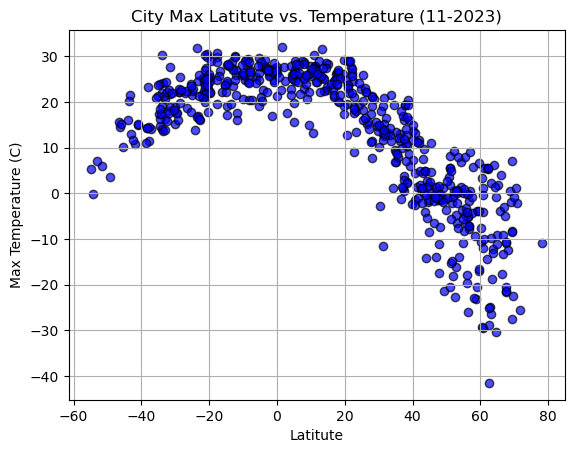

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.7)
plt.title("City Max Latitute vs. Temperature (11-2023)")
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/city_latitute_vs_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

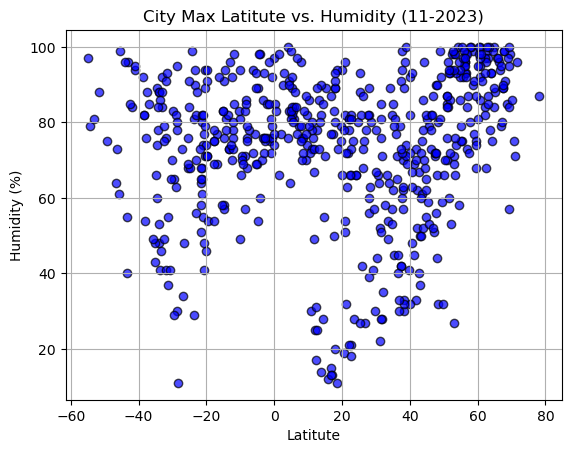

In [26]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.7)
plt.title("City Max Latitute vs. Humidity (11-2023)")
plt.xlabel("Latitute")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/city_lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

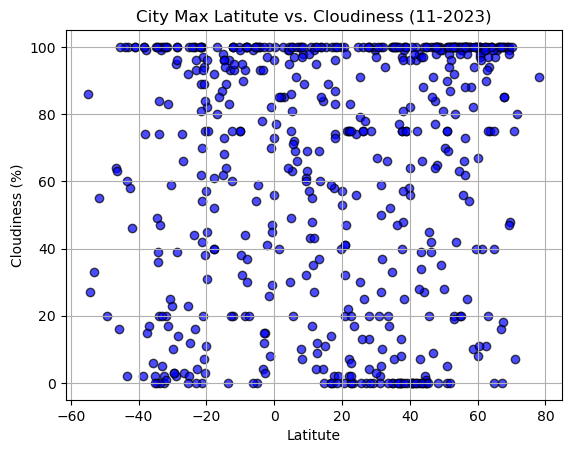

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.7)
plt.title("City Max Latitute vs. Cloudiness (11-2023)")
plt.xlabel("Latitute")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/city_lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

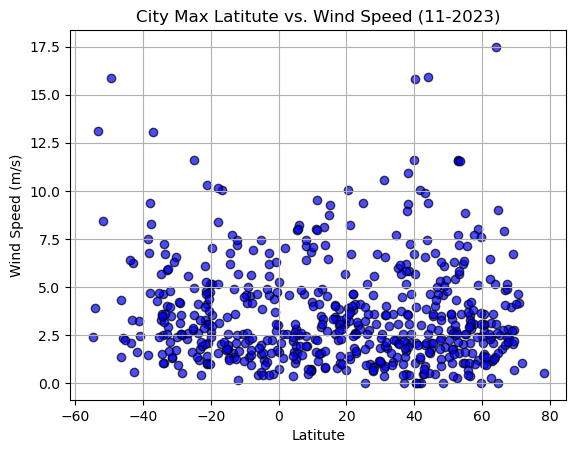

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.7)
plt.title("City Max Latitute vs. Wind Speed (11-2023)")
plt.xlabel("Latitute")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/lat_vs_wind_speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def linearregression():
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atbara,17.7022,33.9864,26.44,50,58,3.86,SD,1700957217
1,haparanda,65.8355,24.1368,-3.97,97,99,1.75,SE,1700957217
2,vuktyl,63.8567,57.3094,-12.16,93,100,1.34,RU,1700957218
8,bethel,41.3712,-73.4140,1.38,69,0,0.00,US,1700957219
10,san angelo,31.4638,-100.4370,12.52,85,100,0.89,US,1700956930


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,vila velha,-20.3297,-40.2925,23.97,71,75,5.14,BR,1700957218
4,la foa,-21.7108,165.8276,25.32,58,89,3.30,NC,1700957219
5,port-aux-francais,-49.3500,70.2167,3.60,75,20,15.85,TF,1700957219
6,port mathurin,-19.6833,63.4167,24.52,71,31,7.01,MU,1700957220
7,edinburgh of the seven seas,-37.0676,-12.3116,14.17,85,17,13.05,SH,1700957220


###  Temperature vs. Latitude Linear Regression Plot

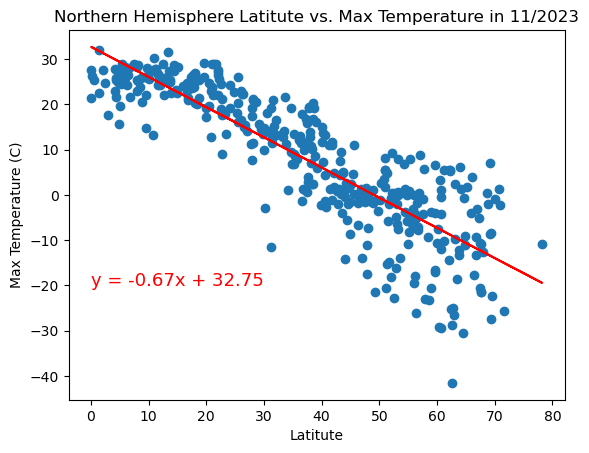

The r-value is: -0.8627823765486516
y = -0.67x + 32.75


In [32]:
# Linear regression on Northern Hemisphere
x_axis= northern_hemi_df['Lat']
y_axis= northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.title("Northern Hemisphere Latitute vs. Max Temperature in 11/2023")
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (C)")
plt.annotate(line_eq,(0,-20),fontsize=13,color="red")
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)

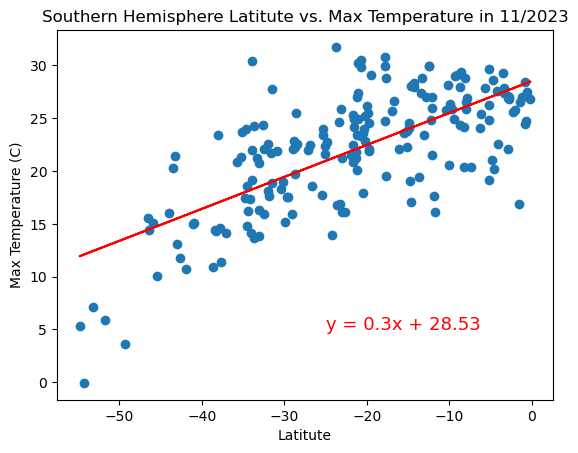

The r-value is: 0.7018813192503979
y = 0.3x + 28.53


In [33]:
# Linear regression on Southern Hemisphere
x_value= southern_hemi_df['Lat']
y_value= southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.title("Southern Hemisphere Latitute vs. Max Temperature in 11/2023")
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (C)")
plt.annotate(line_eq,(-25,5),fontsize=13,color="red")
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)

**Discussion about the linear relationship:** 
In Northern Hemisphere, the latitude has a inverse relationship with maximum temperature while the latitude has a direct relationship in Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

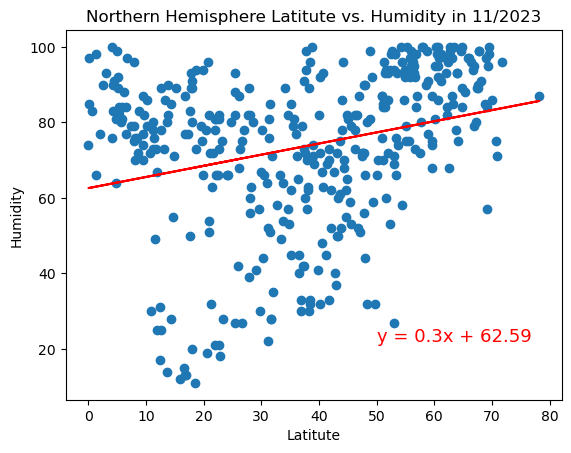

The r-value is: 0.27248741091034223
y = 0.3x + 62.59


In [34]:
# Northern Hemisphere Humidity vs. Latitute Linear Regression Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("Northern Hemisphere Latitute vs. Humidity in 11/2023")
plt.xlabel("Latitute")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,22),fontsize=13, color="red")
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)

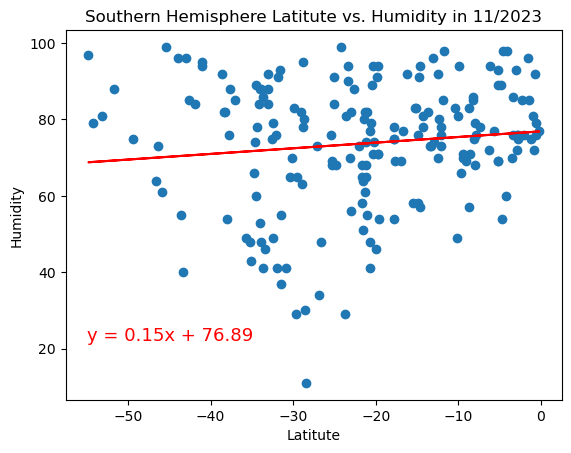

The r-value is: 0.11832684182167351
y = 0.15x + 76.89


In [35]:
# Southern Hemisphere Latitude vs. Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("Southern Hemisphere Latitute vs. Humidity in 11/2023")
plt.xlabel("Latitute")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-55,22),fontsize=13, color="red")
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)

**Discussion about the linear relationship: Northern Hemisphere and Southern Hemisphere latitude are directly proported to humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

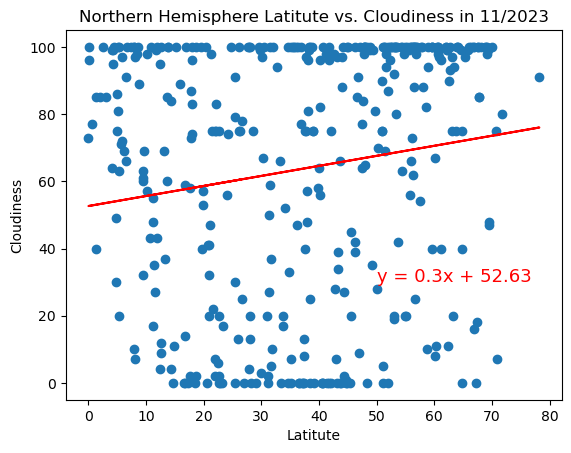

The r-value is: 0.15492883482586509
y = 0.3x + 52.63


In [36]:
# Northern Hemisphere Latitute vs. Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("Northern Hemisphere Latitute vs. Cloudiness in 11/2023")
plt.xlabel("Latitute")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(50,30),fontsize=13, color="red")
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)

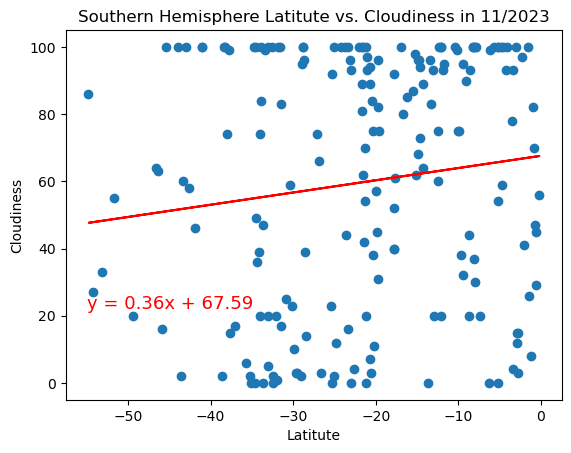

The r-value is: 0.12905663864108607
y = 0.36x + 67.59


In [37]:
# Southern Hemisphere Latitute vs. Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("Southern Hemisphere Latitute vs. Cloudiness in 11/2023")
plt.xlabel("Latitute")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,22),fontsize=13, color="red")
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)

**Discussion about the linear relationship: Northern Hemisphere and Southern Hemisphere latitute have direct relationship with cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

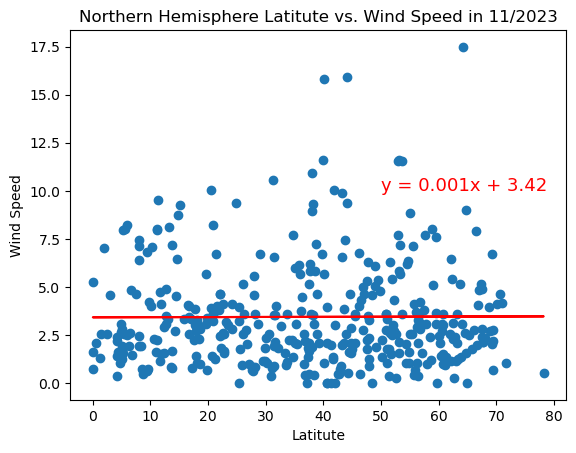

The r-value is: 0.004525550022816279
y = 0.001x + 3.42


In [41]:
# Northern Hemisphere Wind Speed vs. Latitute
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("Northern Hemisphere Latitute vs. Wind Speed in 11/2023")
plt.xlabel("Latitute")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(50,10),fontsize=13, color="red")
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)

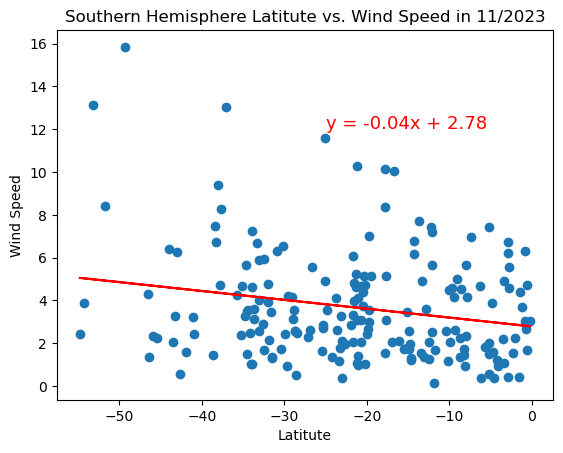

The r-value is: -0.21126293363312282
y = -0.04x + 2.78


In [39]:
# Southern Hemisphere Wind Speed vs. Latitute
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("Southern Hemisphere Latitute vs. Wind Speed in 11/2023")
plt.xlabel("Latitute")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-25,12),fontsize=13, color="red")
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)

**Discussion about the linear relationship: Northern Hemisphere latitute is slightly direct proported to the wind speed while Souther Hemisphere latitute is inversely proported to wind speed. 